In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset = pd.read_csv('movie_data.csv')

In [ ]:
dataset.head()

,id,text,genre
0,1,t expect me to be all broken up over poor Drex...,thriller
1,2,you find out where the bachelor party is? COLE...,comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [ ]:
dataset.tail()

,id,text,genre
8994,11328,E to Malkovich You bastard! Lotte lunges for M...,2
8995,11329,e got two big guns... HAH!!!... I go out now.....,0
8996,11330,less. His hand reaches unconsciously for a cig...,2
8997,11331,"vice, the NSA and the CIA. MIRANDA Have someon...",0
8998,11332,"an't contain himself. He's stuffing himself, w...",0


In [ ]:
print("Number of rows: ",dataset.shape[0])
print("Number of coloums: ",dataset.shape[1])

Number of rows:  8999
Number of coloums:  3


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      8999 non-null   int64 
 1   text    8999 non-null   object
 2   genre   8999 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 211.0+ KB


In [ ]:
dataset.isna().sum()

id       0
text     0
genre    0
dtype: int64

In [ ]:
dataset['genre'].unique()

array(['thriller', 'comedy', 'drama', 'action', 'sci-fi', 'other',
       'romance', 'horror', 'adventure'], dtype=object)

In [ ]:
encode_genre = {'thriller':0 , 'comedy':1 , 'drama':2 , 'action':3 , 'sci-fi':4 , 'other':5 , 'romance':6 , 'horror':7 , 'adventure':8}

In [ ]:
dataset['genre'] = dataset['genre'].map(encode_genre)

In [ ]:
dataset.head()

,id,text,genre
0,1,t expect me to be all broken up over poor Drex...,0
1,2,you find out where the bachelor party is? COLE...,1
2,3,"up Come, I have a surprise.... She takes him ...",2
3,4,ded by the two detectives. INT. JEFF'S APARTME...,0
4,5,"nd dismounts, just as the other children reach...",2


In [ ]:
import re
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
courpus = []

In [ ]:
dataset['text'][0]

"t expect me to be all broken up over poor Drexl. I think he was a fuckin', freeloadin', parasitic scumbag, and he got exactly what he deserved. I got no pity for a mad dog like that. I think I should get a merit badge or somethin'. Dick rests his head in his hands. CLARENCE Look, buddy, I realize I'm layin' some pretty heavy shit on ya, but I need you to rise to the occasion. So, drink some more wine. Get used to the idea, and get your friend to the phone. EXT. LOS ANGELES ZOO DAY CLOSEUP A black panther, the four legged kind, paces back and forth. Clarence, Alabama, Dick and Elliot Blitzer are walking through the zoo. One look at Elliot and you can see what type of actor he is, a real GQ, blow dry boy. As they walk and talk, Clarence is eating a box of animal crackers and Alabama is blowing soap bubbles. ELLIOT So you guys got five hundred thousand dollars worth of cola that you're unloading CLARENCE Want an animal cracker? ELLIOT Yeah, OK. He takes one. CLARENCE Leave the gorillas. 

In [ ]:
re.sub(pattern='[^a-zA-Z]', repl=' ',string=dataset['text'][0])

't expect me to be all broken up over poor Drexl  I think he was a fuckin   freeloadin   parasitic scumbag  and he got exactly what he deserved  I got no pity for a mad dog like that  I think I should get a merit badge or somethin   Dick rests his head in his hands  CLARENCE Look  buddy  I realize I m layin  some pretty heavy shit on ya  but I need you to rise to the occasion  So  drink some more wine  Get used to the idea  and get your friend to the phone  EXT  LOS ANGELES ZOO DAY CLOSEUP A black panther  the four legged kind  paces back and forth  Clarence  Alabama  Dick and Elliot Blitzer are walking through the zoo  One look at Elliot and you can see what type of actor he is  a real GQ  blow dry boy  As they walk and talk  Clarence is eating a box of animal crackers and Alabama is blowing soap bubbles  ELLIOT So you guys got five hundred thousand dollars worth of cola that you re unloading CLARENCE Want an animal cracker  ELLIOT Yeah  OK  He takes one  CLARENCE Leave the gorillas  

In [ ]:
re.sub(pattern='[^a-zA-Z]', repl=' ',string=dataset['text'][0]).lower()

't expect me to be all broken up over poor drexl  i think he was a fuckin   freeloadin   parasitic scumbag  and he got exactly what he deserved  i got no pity for a mad dog like that  i think i should get a merit badge or somethin   dick rests his head in his hands  clarence look  buddy  i realize i m layin  some pretty heavy shit on ya  but i need you to rise to the occasion  so  drink some more wine  get used to the idea  and get your friend to the phone  ext  los angeles zoo day closeup a black panther  the four legged kind  paces back and forth  clarence  alabama  dick and elliot blitzer are walking through the zoo  one look at elliot and you can see what type of actor he is  a real gq  blow dry boy  as they walk and talk  clarence is eating a box of animal crackers and alabama is blowing soap bubbles  elliot so you guys got five hundred thousand dollars worth of cola that you re unloading clarence want an animal cracker  elliot yeah  ok  he takes one  clarence leave the gorillas  

In [ ]:
for i in range(0 , dataset.shape[0]):
 text = re.sub(pattern='[^a-zA-Z]' , repl=' ',string=dataset['text'][i])
 text = text.lower()
 words = text.split()
 cleaned_words = [word for word in words if word not in set(stopwords.words('english'))]
 ps = PorterStemmer()
 words = [ps.stem(word) for word in cleaned_words]
 text = ' '.join(words)
 courpus.append(text)

In [ ]:
courpus[0]

'expect broken poor drexl think fuckin freeloadin parasit scumbag got exactli deserv got piti mad dog like think get merit badg somethin dick rest head hand clarenc look buddi realiz layin pretti heavi shit ya need rise occas drink wine get use idea get friend phone ext lo angel zoo day closeup black panther four leg kind pace back forth clarenc alabama dick elliot blitzer walk zoo one look elliot see type actor real gq blow dri boy walk talk clarenc eat box anim cracker alabama blow soap bubbl elliot guy got five hundr thousand dollar worth cola unload clarenc want anim cracker elliot yeah ok take one clarenc leav gorilla e'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10000 , ngram_range = (1 , 2))
X = cv.fit_transform(courpus).toarray()
y = dataset['genre'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y, test_size = 0.2 , random_state = 0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha = 0.1)
classifier.fit(x_train , y_train)

MultinomialNB(alpha=0.1)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 3, 2])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
cm

array([[490,   6,  49,   5,   4,   0,   0,   3,   0],
       [ 15, 192,  14,   2,   0,   0,   0,   0,   0],
       [ 43,   7, 656,   6,   0,   0,   0,   3,   0],
       [  6,   5,   4, 179,   0,   0,   0,   0,   0],
       [  4,   0,   2,   2,  33,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,  14,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,   0],
       [  5,   2,   2,   0,   0,   0,   0,  29,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0,  14]])

<Axes: >

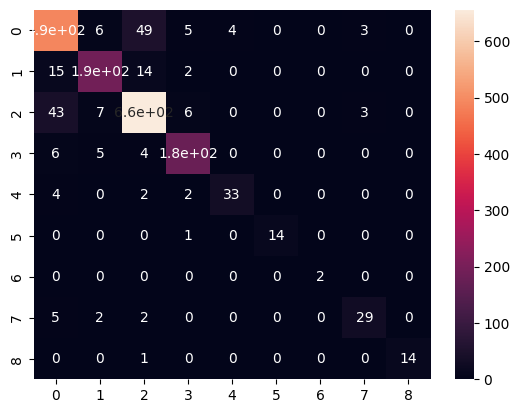

In [ ]:
import seaborn as sns
sns.heatmap(cm , annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)


0.8938888888888888

In [ ]:
import pickle

In [ ]:
pickle.dump(cv , open('cv.pkl' , 'wb'))

In [ ]:
pickle.dump(classifier , open('model.pkl' , 'wb'))